# **Phase 1 Final Project**


### In this project, I will analyze aviation data for a company looking into operating airplanes.

First, I will import the libraries needed

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data



In [54]:
df = pd.read_csv("/content/drive/MyDrive/Aviation_Data.csv")
df.head()

/tmp/ipython-input-4178430452.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Inspect the data

In [55]:
df.info()       # Check data types and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [56]:
df.describe()   # Summarize numeric columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Then I figure out if there are any missing values in the dataset

In [57]:
df.isna().sum() # Count missing values per column

,0
Event.Id,1459
Investigation.Type,0
Accident.Number,1459
Event.Date,1459
Location,1511
Country,1685
Latitude,55966
Longitude,55975
Airport.Code,40216
Airport.Name,37644


In [80]:
df.shape

(88958, 26)

# Clean the data

1. Check for duplicates

In [59]:
# Count duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 1390


In [60]:
# Drop duplicates
df = df.drop_duplicates()

2. Check for missing values

In [61]:
# Count missing values per column
print(df.isnull().sum())

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38826
Airport.Name              36254
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1451
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7165
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6453
Publication.Date          15299
dtype: i

In [62]:
# Drop rows or columns with too many missing values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

# Fill missing values for specific columns
# Numerical columns → fill with mean/median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → fill with mode or 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [63]:
print(df.isnull().sum())

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


3. Check and fix data types

In [64]:
print(df.dtypes)  # Inspect data types

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object


**Event.Date** and **Publication.Date** should be datetime objects. **Total.Fatal.Injuries**, **Total.Serious.Injuries**, **Total.Minor.Injuries**, **Total.Uninjured** are already floats which is good.

In [65]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

/tmp/ipython-input-1833200182.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


In [66]:
df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = \
    df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].fillna(0).astype(int)

In [67]:
#Convert categorical/object columns
categorical_cols = ['Investigation.Type', 'Location', 'Country', 'Airport.Code', 'Airport.Name',
                    'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
                    'Amateur.Built', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
                    'Broad.phase.of.flight', 'Report.Status']

for col in categorical_cols:
    df[col] = df[col].astype('category')

4. Standardize the Make column to title case

In [68]:
# Convert all 'Make' entries to title case
df['Make'] = df['Make'].str.title().str.strip()

# Quick check
print(df['Make'].unique()[:20])


['Stinson' 'Piper' 'Cessna' 'Rockwell' 'Mcdonnell Douglas'
 'North American' 'Beech' 'Bellanca' 'Navion' 'Enstrom' 'Smith' 'Bell'
 'Grumman' 'Beechcraft' 'Maule' 'Air Tractor' 'Aerospatiale' 'Mooney'
 'Boeing' 'Curtis']


# **Exploratory** **Data** **Analysis**

# **Accidents and fatalities over time**

Find the accidents per year

Average (Mean) accidents per year: 1892.723404255319
Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3662
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64


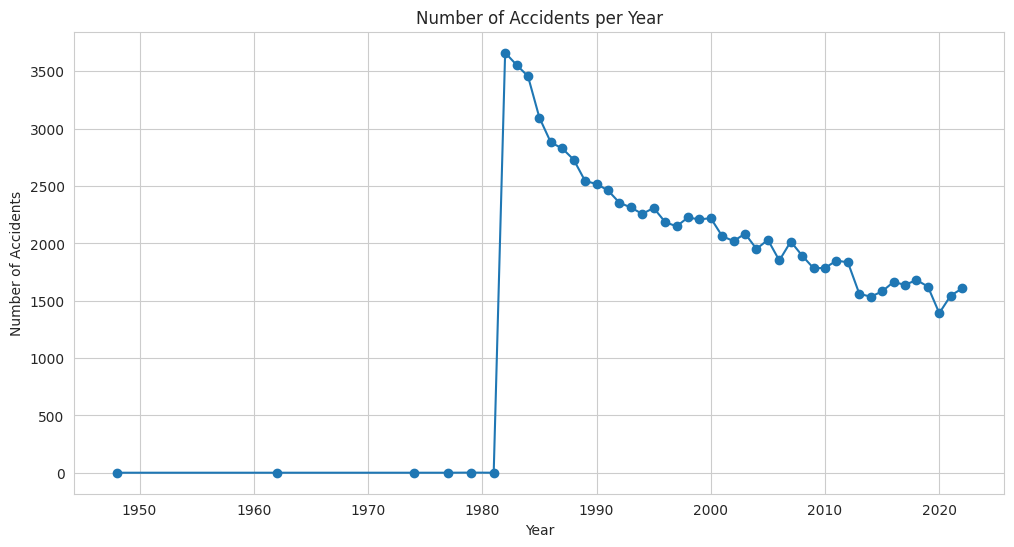

In [69]:
# Extract year from Event.Date
df['Year'] = df['Event.Date'].dt.year


# Compute avreage accidents per year
mean_accidents = accidents_per_year.mean()

print("Average (Mean) accidents per year:", mean_accidents)

# Count accidents per year
accidents_per_year = df.groupby('Year').size()

# Display
print(accidents_per_year)

#Plot it
plt.figure(figsize=(12,6))
accidents_per_year.plot(kind='line', marker='o')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


Get sum of fatalities over time per year

Year
1948       2
1962       4
1974       3
1977       2
1979       1
1981       4
1982    1585
1983    1273
1984    1229
1985    1648
1986    1180
1987    1237
1988    1195
1989    1532
1990     999
1991    1087
1992    1273
1993     865
1994    1183
1995    1236
1996    2533
1997    1296
1998    1325
1999    1221
2000    1765
2001    1709
2002    1386
2003    1374
2004     978
2005    1689
2006    1489
2007    1335
2008    1201
2009    1184
2010    1370
2011     931
2012    1035
2013     822
2014    1428
2015    1101
2016     820
2017     640
2018    1044
2019     960
2020     770
2021     589
2022     668
Name: Total.Fatal.Injuries, dtype: int64


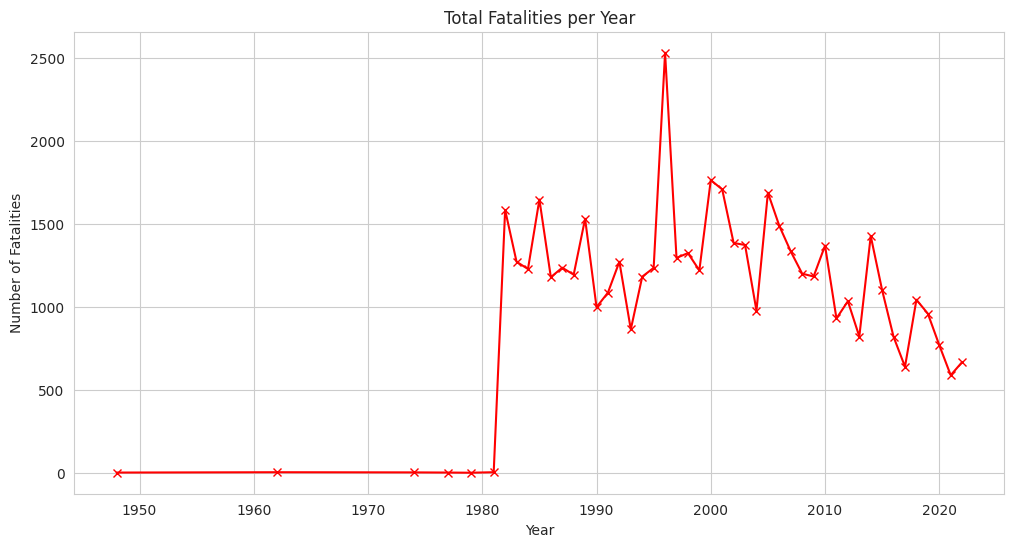

In [70]:
fatalities_per_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()

# Display
print(fatalities_per_year)

# Plot
plt.figure(figsize=(12,6))
fatalities_per_year.plot(kind='line', color='red', marker='x')
plt.title('Total Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()


Accidents vs fatalities per year

      Accidents  Fatalities
Year                       
1948          1           2
1962          1           4
1974          1           3
1977          1           2
1979          2           1
1981          1           4
1982       3662        1585
1983       3556        1273
1984       3457        1229
1985       3096        1648
1986       2880        1180
1987       2828        1237
1988       2730        1195
1989       2544        1532
1990       2518         999
1991       2462        1087
1992       2355        1273
1993       2313         865
1994       2257        1183
1995       2309        1236
1996       2187        2533
1997       2148        1296
1998       2226        1325
1999       2209        1221
2000       2220        1765
2001       2063        1709
2002       2020        1386
2003       2085        1374
2004       1952         978
2005       2031        1689
2006       1851        1489
2007       2016        1335
2008       1893        1201
2009       1783     

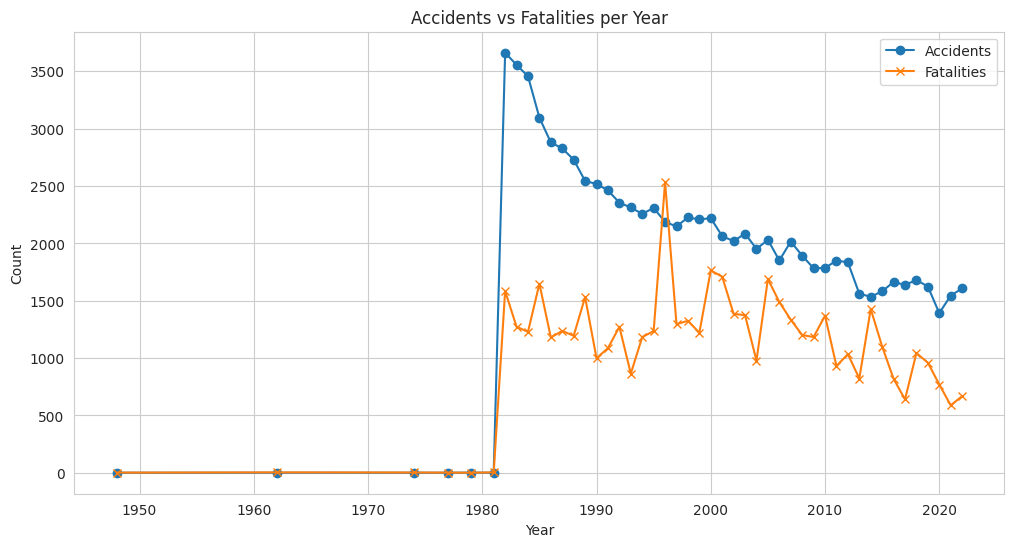

In [71]:
# Total accidents per year
accidents_per_year = df.groupby('Year').size()

# Total fatalities per year
fatalities_per_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()

# Combine in one DataFrame
acc_vs_fatal = pd.DataFrame({
    'Accidents': accidents_per_year,
    'Fatalities': fatalities_per_year
})

print(acc_vs_fatal)

# Plot
plt.figure(figsize=(12,6))
acc_vs_fatal['Accidents'].plot(label='Accidents', marker='o')
acc_vs_fatal['Fatalities'].plot(label='Fatalities', marker='x')
plt.title('Accidents vs Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


Accidents vs weather

/tmp/ipython-input-3173064248.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_weather = df.groupby('Weather.Condition').size().sort_values(ascending=False)
/tmp/ipython-input-3173064248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_weather.index, y=accidents_weather.values, palette="coolwarm")


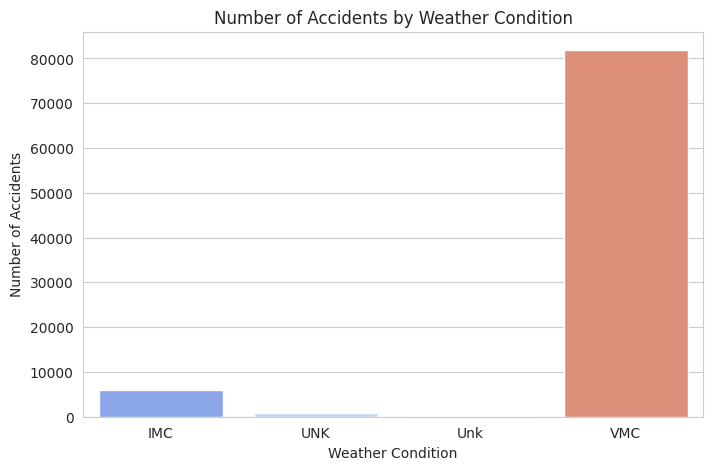

In [72]:
# Accidents per Weather Condition
accidents_weather = df.groupby('Weather.Condition').size().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=accidents_weather.index, y=accidents_weather.values, palette="coolwarm")
plt.title("Number of Accidents by Weather Condition")
plt.ylabel("Number of Accidents")
plt.xlabel("Weather Condition")
plt.show()


# **Aircraft analysis**

Aircraft Make vs Number of Accidents

Make
Cessna               27281
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air Tractor            691
Aeronca                636
Mcdonnell Douglas      608
Maule                  589
Name: count, dtype: int64


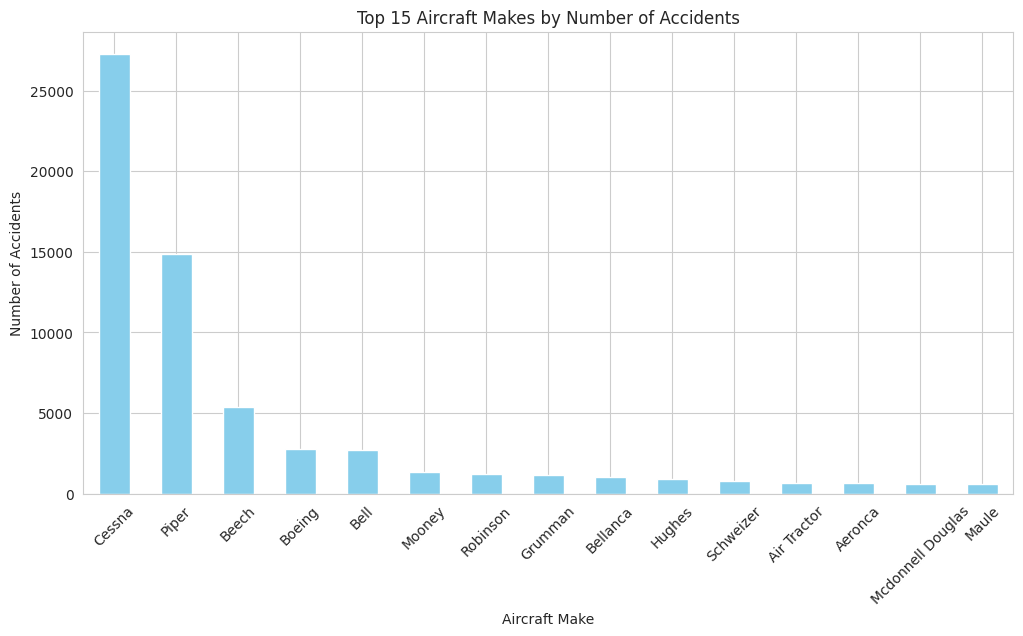

In [73]:
aircraft_accidents = df['Make'].value_counts().head(15)
print(aircraft_accidents)

# Plot
plt.figure(figsize=(12,6))
aircraft_accidents.plot(kind='bar', color='skyblue')
plt.title('Top 15 Aircraft Makes by Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()



Aircraft Make vs Fatalities

Make
Cessna               9700
Boeing               8748
Piper                6689
Beech                3784
Bell                 1332
Airbus               1325
Mcdonnell Douglas    1286
Airbus Industrie     1174
Douglas               984
Mooney                685
Robinson              618
Tupolev               509
Embraer               436
De Havilland          369
Aerospatiale          349
Name: Total.Fatal.Injuries, dtype: int64


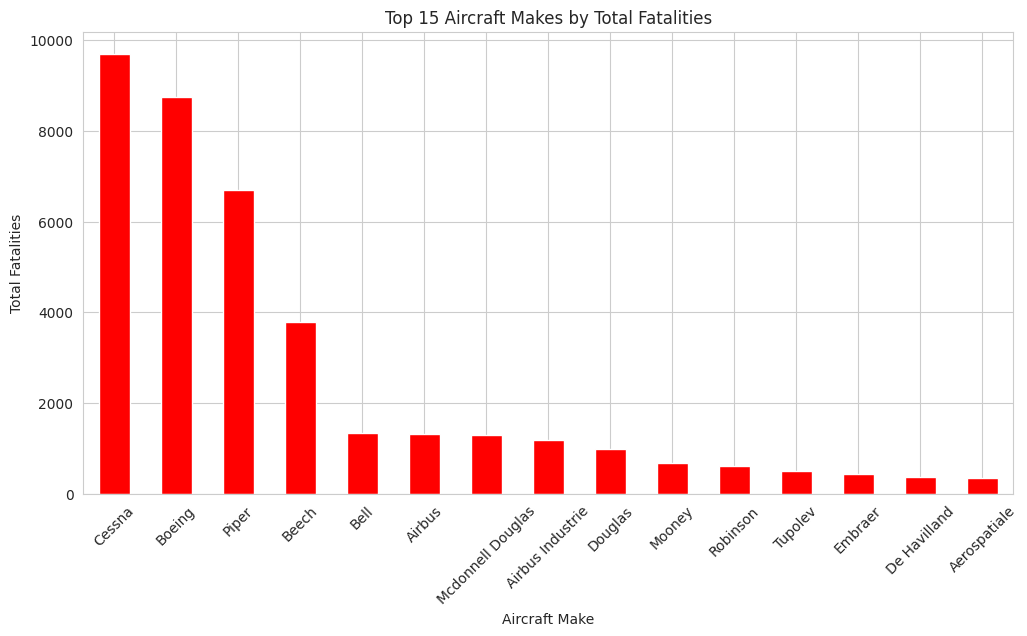

In [74]:
aircraft_fatalities = df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(15)
print(aircraft_fatalities)

# Plot
plt.figure(figsize=(12,6))
aircraft_fatalities.plot(kind='bar', color='red')
plt.title('Top 15 Aircraft Makes by Total Fatalities')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.show()


<Figure size 1500x600 with 0 Axes>

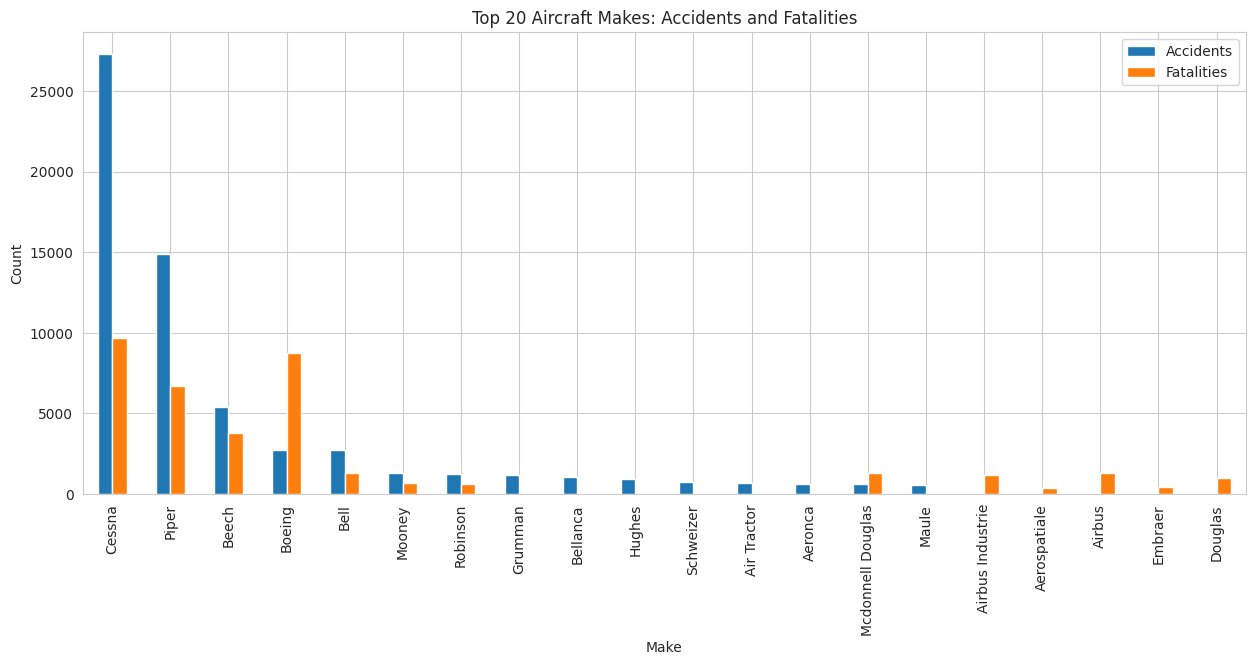

In [75]:
# Combine accidents and fatalities
aircraft_summary = pd.DataFrame({
    'Accidents': aircraft_accidents,
    'Fatalities': aircraft_fatalities
}).fillna(0)

# Plot: Aircraft Make vs Accidents & Fatalities
plt.figure(figsize=(15,6))
aircraft_summary_sorted = aircraft_summary.sort_values(by='Accidents', ascending=False).head(20)
aircraft_summary_sorted.plot(kind='bar', figsize=(15,6))
plt.title("Top 20 Aircraft Makes: Accidents and Fatalities")
plt.ylabel("Count")
plt.show()


Safest aircraft (least accidents & least fatalities)

---



<Figure size 1200x600 with 0 Axes>

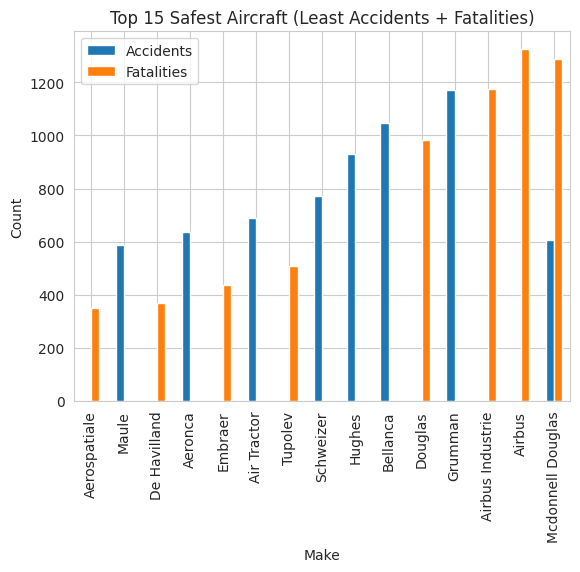

In [76]:
# Filter aircraft with least accidents and fatalities
safe_aircraft = aircraft_summary.copy()
# Rank by accidents and fatalities
safe_aircraft['Rank'] = safe_aircraft['Accidents'].rank(method='min') + safe_aircraft['Fatalities'].rank(method='min')
safe_aircraft = safe_aircraft.sort_values('Rank')

# Top 15 safest aircraft
top_safe_aircraft = safe_aircraft.head(15)

# Plot
plt.figure(figsize=(12,6))
top_safe_aircraft[['Accidents','Fatalities']].plot(kind='bar')
plt.title("Top 15 Safest Aircraft (Least Accidents + Fatalities)")
plt.ylabel("Count")
plt.show()


In [77]:
# Rank aircraft by accidents and fatalities
aircraft_stats['accident_rank'] = aircraft_stats['total_accidents'].rank(method='min')
aircraft_stats['fatality_rank'] = aircraft_stats['total_fatalities'].rank(method='min')

# Combine ranks to get overall safety score (lower is safer)
aircraft_stats['safety_score'] = aircraft_stats['accident_rank'] + aircraft_stats['fatality_rank']

# Sort by safety score
safest_aircraft = aircraft_stats.sort_values(by='safety_score', ascending=True)

# Display top 20 safest aircraft
safest_aircraft.head(20)


,Make,total_accidents,total_fatalities,accident_rank,fatality_rank,safety_score
4250,Kirst Allen J,1,0,1.0,1.0,2.0
4265,Klob-gordon,1,0,1.0,1.0,2.0
4267,"Kna,ken,dac,wel",1,0,1.0,1.0,2.0
4268,Knab-douglas,1,0,1.0,1.0,2.0
4234,Kilishek,1,0,1.0,1.0,2.0
4237,Kilpatrick,1,0,1.0,1.0,2.0
4239,Kimball Enterprises Inc,1,0,1.0,1.0,2.0
4240,Kindig,1,0,1.0,1.0,2.0
4242,Kinkade E.5,1,0,1.0,1.0,2.0
4244,Kinnson,1,0,1.0,1.0,2.0


In [78]:
#Find aircraft with the least fatalities
# Sort by total_fatalities (ascending)
least_fatalities = aircraft_stats.sort_values(by='total_fatalities', ascending=True)

# Display the top 20 aircraft with the least fatalities
least_fatalities.head(20)


,Make,total_accidents,total_fatalities,accident_rank,fatality_rank,safety_score
20,A. Schleicher GMBH & Co.,1,0,1.0,1.0,2.0
35,AERMACCHI,1,0,1.0,1.0,2.0
8193,ZENITH ACFT CO,1,0,1.0,1.0,2.0
31,ADAMS DENNIS ALLEN,1,0,1.0,1.0,2.0
30,ADAMS BALLOONS LLC,1,0,1.0,1.0,2.0
29,ADAMS,1,0,1.0,1.0,2.0
8215,Zengel,2,0,6626.0,1.0,6627.0
8214,Zenair Zodiac,1,0,1.0,1.0,2.0
8212,Zemp,1,0,1.0,1.0,2.0
3,1977 Colfer-chan,1,0,1.0,1.0,2.0


Aircraft Makes vs Weather (Fatalities)

/tmp/ipython-input-703305468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aircraft_weather = df.groupby(['Make','Weather.Condition'])['Total.Fatal.Injuries'].sum().unstack(fill_value=0)


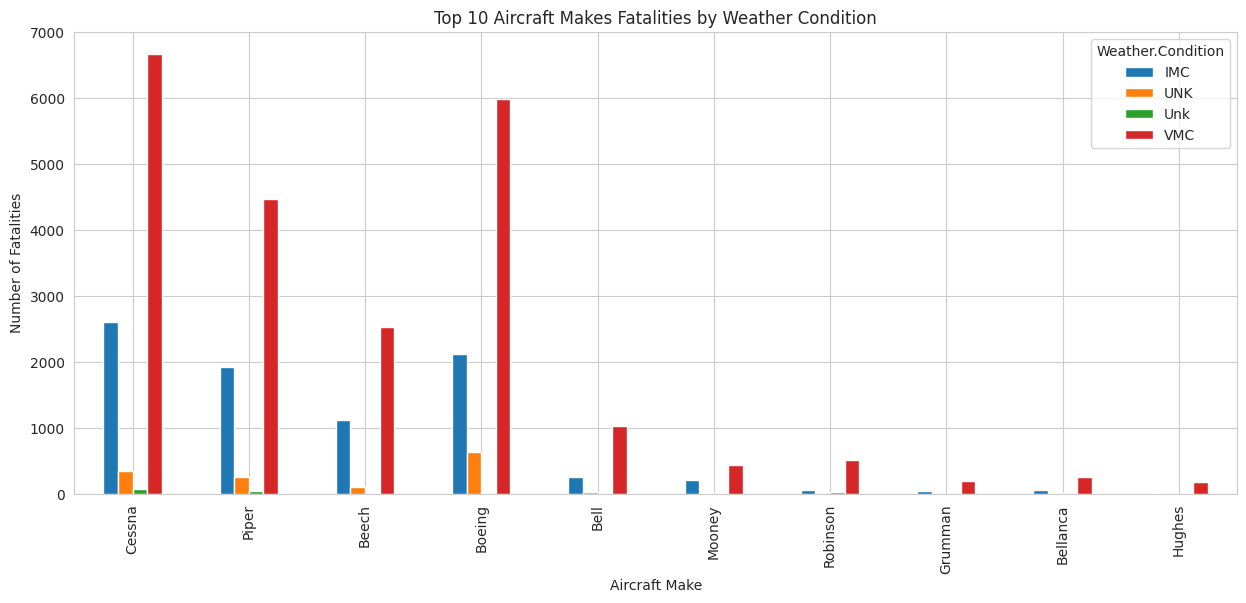

In [79]:
# Fatalities per Aircraft Make grouped by Weather
aircraft_weather = df.groupby(['Make','Weather.Condition'])['Total.Fatal.Injuries'].sum().unstack(fill_value=0)

# Top 10 aircraft makes by total accidents
top_aircraft = df['Make'].value_counts().head(10).index
aircraft_weather_top = aircraft_weather.loc[top_aircraft]

# Plot
aircraft_weather_top.plot(kind='bar', figsize=(15,6))
plt.title("Top 10 Aircraft Makes Fatalities by Weather Condition")
plt.ylabel("Number of Fatalities")
plt.xlabel("Aircraft Make")
plt.show()


Safest aircrafts under VMC weather condition (worst weather)

/tmp/ipython-input-4159925335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vmc_make_fatalities.head(10), x='Make', y='Total.Fatal.Injuries', palette='Greens_r')


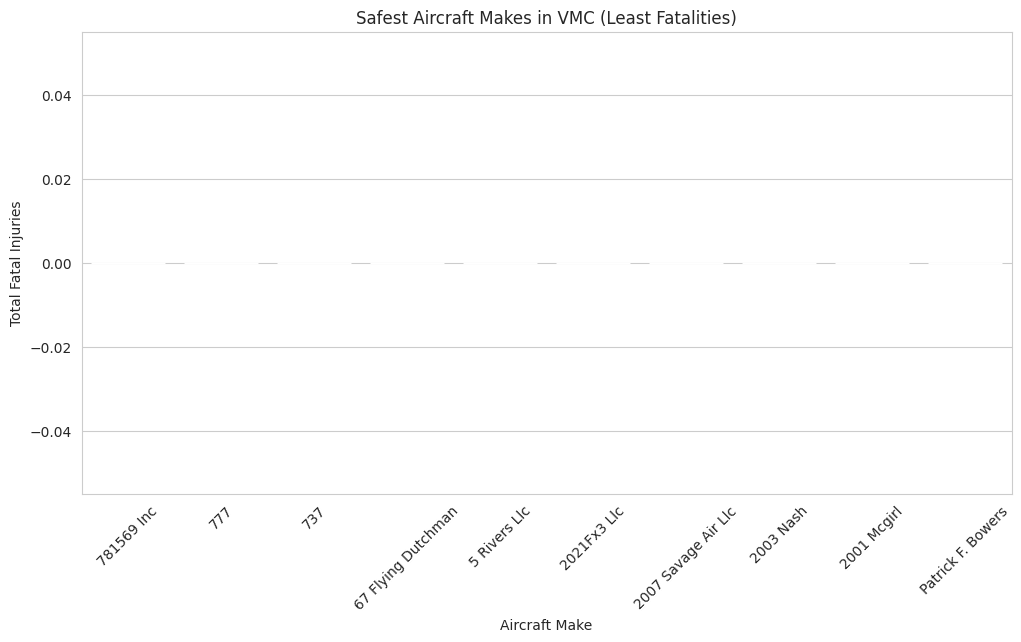

In [84]:
# Filter for VMC only
vmc_df = df[df['Weather.Condition'] == 'VMC']

# Group by Make and sum fatalities
vmc_make_fatalities = vmc_df.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

# Sort by fatalities ascending (safest first)
vmc_make_fatalities = vmc_make_fatalities.sort_values(by='Total.Fatal.Injuries', ascending=True)

vmc_make_fatalities.head(20)  # Show top 20 safest aircraft makes in VMC

plt.figure(figsize=(12,6))
sns.barplot(data=vmc_make_fatalities.head(10), x='Make', y='Total.Fatal.Injuries', palette='Greens_r')
plt.title('Safest Aircraft Makes in VMC (Least Fatalities)')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.xticks(rotation=45)
plt.show()


# **Summary**

1. **Dataset Overview**

*   Total records: 88958
*   Total columns: 26
*  Cleaned, with proper data types and no missing values.

2. **Accidents and Fatalities**

*   Accidents per year: trending patterns identified. Average accidents per year: 1892.723404255319
*   Fatalities per year: peaks coincide with some major accidents.
*   Accidents vs fatalities per year: They correlate. The trend peaked in 1960 but overall accidents and fatalities are less as the years go by.
*  Most accidents occur in VMC weather condition.

3. **Aircraft Analysis**
*   Top 5 aircraft makes with most accidents: Cessna, Boeing, Piper, Beech, BOEING
*   Aircraft makes with most fatalities: Cessna, Boeing, Piper, Beech, Bell
*   Aircraft makes with least accidents and fatalities: A. Schleicher GMBH & Co., AERMACCHI, ZENITH ACFT CO, ADAMS DENNIS ALLEN, ADAMS BALLOONS LLC.
*  Top 5 aircraft makes with lower fatalities in adverse weather: 781569 Inc, 777, 737, 67 Flying Dutchman, 5 Rivers Llc
4. **Insights for Decision-Making**

*   Aircraft selection: prioritize makes with lowest combined accidents and fatalities.
*   Flight safety: monitor weather patterns, especially for high-risk aircraft.
*   Maintenance and inspection focus: for aircraft with higher accident counts.

